In [3]:
!pip install fsspec

You should consider upgrading via the 'c:\users\iatrade\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install pipreqs

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=dc2fbd685db0c82d5586816514ac87475fdcb9f22ce57b20b5134ccc6e7d26bc
  Stored in directory: c:\users\iatrade\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


You should consider upgrading via the 'c:\users\iatrade\anaconda3\python.exe -m pip install --upgrade pip' command.


In [373]:
import fsspec
import warnings
warnings.filterwarnings('ignore') #pour ignorer les avertissements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

In [261]:
data = pd.read_csv("C://Users//iatrade//Downloads//Dataset.csv", sep=';')


In [370]:
df = data.copy()
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [371]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [263]:
df.shape

(10127, 21)

In [264]:
df.replace("Unknown", np.nan, inplace = True)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [265]:
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

## Voir les diferentes modalités des variables qualitative

In [266]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [267]:
print ("Gender")
print(df["Gender"].value_counts())
print ("Education_Level")
print(df["Education_Level"].value_counts())
print ("Marital_Status")
print(df["Marital_Status"].value_counts())
print ("Income_Category")
print(df["Income_Category"].value_counts())
print ("Card_Category")
print(df["Card_Category"].value_counts())


Gender
F    5358
M    4769
Name: Gender, dtype: int64
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [268]:
#------------------
#Card_Category     -
#Income_Category   -----> encodage ordinal
#Education_Level   -
#------------------

# Marital_Status   -----> encodage simple

In [269]:
df.dropna (axis = 0, how = 'any', inplace = True)
df.shape

(7081, 21)

In [270]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [271]:
taux_nan = (df.isna().sum()/df.shape[0])*100
taux_nan.sort_values(ascending = False) # tri par ordre decroissant

Avg_Utilization_Ratio       0.0
Months_on_book              0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Total_Relationship_Count    0.0
Total_Ct_Chng_Q4_Q1         0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
CLIENTNUM                   0.0
dtype: float64

In [272]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [273]:
df.drop(['CLIENTNUM'], axis = 1, inplace = True)

## Bibliotheque d'encodage

In [274]:
encod = {'Married': 2, 'Single': 0, 'Divorced':1,'M': 0, 'F':1,
         'Blue': 4, 'Silver': 3, 'Gold':2, 'Platinum':1,
         'Uneducated': 6, 'College': 5, 'High School':4, 'Graduate':3, 'Post-Graduate':2, 'Doctorate':1,
         'Less than $40K': 5, '$40K - $60K': 4, '$60K - $80K':3, '$80K - $120K':2, '$120K +':1,
         'Existing Customer':1, 'Attrited Customer':0}

## fonction d'encodage

In [275]:
for col in df.select_dtypes("object"):
    df[col] = df[col].map(encod)

In [276]:
y = df["Attrition_Flag"]


In [277]:
y.shape

(7081,)

In [278]:
df.drop(["Attrition_Flag"], inplace = True, axis = 1)

In [279]:
X = df

In [280]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

## ENTRAINEMENT

#1 RANDOM FOREST CLASSIFIER

In [281]:
clf_1 = RandomForestClassifier(n_estimators = 100, max_depth = 5,  random_state = 5)
clf_1.fit(X_train, y_train)

In [283]:
clf_1.score(X_train, y_train)

0.9263518966908797

###  VOYONS SI ON PEUT L'AMELIORER

#2 SUPPORT VECTEUR CLASSIFIER

In [284]:
clf_2 = SVC()
clf_2.fit(X_train, y_train)
clf_2.score(X_train, y_train)

0.8420096852300242

#3 BAGGING

In [285]:
clf_3 = BaggingClassifier(random_state = 5)
clf_3.fit(X_train, y_train)
clf_3.score(X_train, y_train)

0.9975786924939467

#4 LOSTIC REGRESSION

In [303]:
clf_4 = LogisticRegression(random_state=5, solver='liblinear')
clf_4.fit(X_train, y_train)
clf_4.score(X_train, y_train)

0.8946731234866828

#5 Nearest Neighbors

In [287]:
clf_5 = KNeighborsClassifier()
clf_5.fit(X_train, y_train)
clf_5.score(X_train, y_train)

0.9202986279257466

#6 Decision Tree Classifier

In [288]:
clf_6 = DecisionTreeClassifier()
clf_6.fit(X_train, y_train)
clf_6.score(X_train, y_train)

1.0

#7 Gaussian Naïf Bayes

In [289]:
from sklearn.naive_bayes import GaussianNB
clf_7 = GaussianNB()
clf_7.fit(X_train, y_train)
clf_7.score(X_train, y_train)

0.8983050847457628

#8 Perceptron

In [290]:
from sklearn.linear_model import Perceptron
clf_8 = Perceptron()
clf_8.fit(X_train, y_train)
clf_8.score(X_train, y_train)

0.8420096852300242

## EVALUATION 

In [ ]:
#[clf_1, clf_2, clf_3, clf_4, clf_5, clf_6, clf_7, clf_8]

In [298]:
liste = {clf_1:'RANDOM FOREST CLASSIFIER', clf_2:'SUPPORT VECTEUR CLASSIFIER', clf_3:'BAGGING',
         clf_4:'LOSTIC REGRESSION', clf_5:'Nearest Neighbors', clf_6:'Decision Tree Classifier', clf_7:'Gaussian Naïf Bayes', clf_8:'Perceptron'}

In [299]:
def eval (i):
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    
    print('model ', i ,' evaluation is \n', confusion_matrix(y_test, y_pred))
    print('model ', i, ' stats is \n', classification_report(y_test, y_pred),'\n\n\n\n')

In [300]:
for i in liste:
    eval(i)

model  RandomForestClassifier(max_depth=5, random_state=5)  evaluation is 
 [[ 164  166]
 [  27 1768]]
model  RandomForestClassifier(max_depth=5, random_state=5)  stats is 
               precision    recall  f1-score   support

           0       0.86      0.50      0.63       330
           1       0.91      0.98      0.95      1795

    accuracy                           0.91      2125
   macro avg       0.89      0.74      0.79      2125
weighted avg       0.91      0.91      0.90      2125
 




model  SVC()  evaluation is 
 [[   0  330]
 [   0 1795]]
model  SVC()  stats is 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       330
           1       0.84      1.00      0.92      1795

    accuracy                           0.84      2125
   macro avg       0.42      0.50      0.46      2125
weighted avg       0.71      0.84      0.77      2125
 




model  BaggingClassifier(random_state=5)  evaluation is 
 [[ 271   59]
 [  34 17

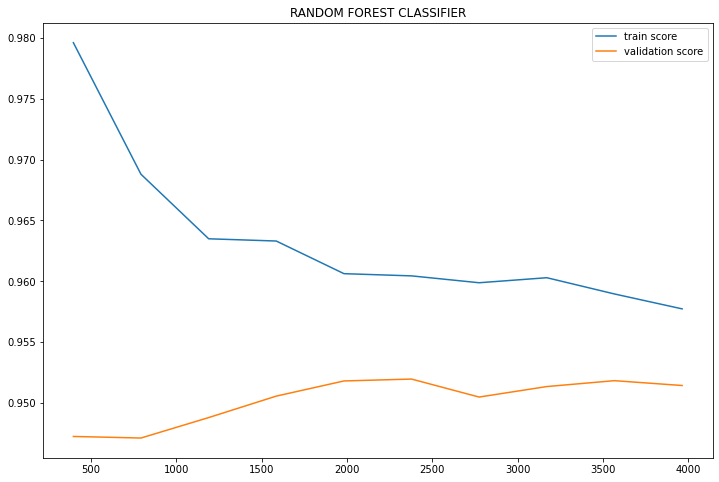

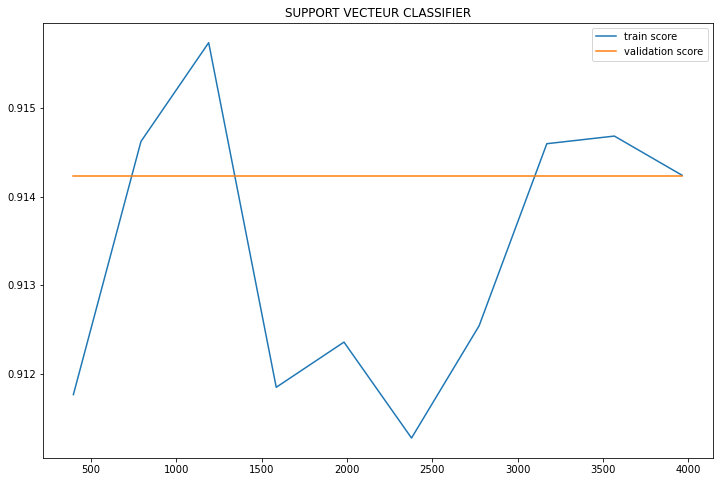

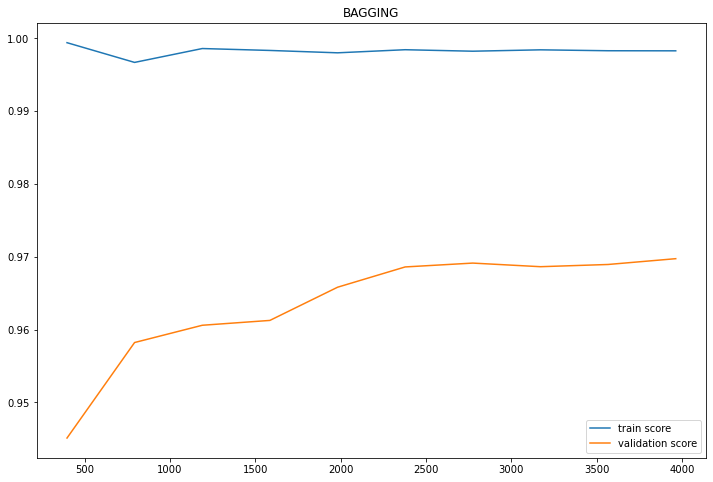

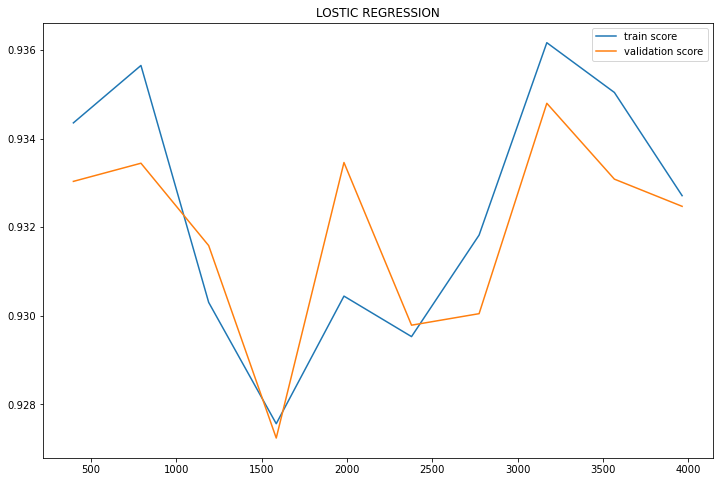

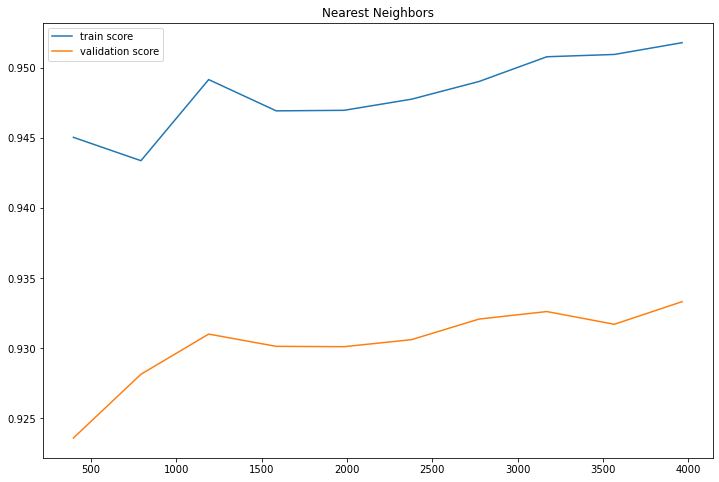

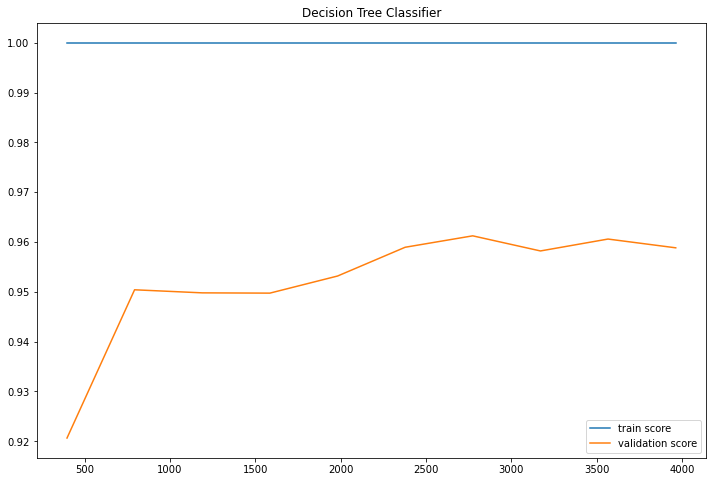

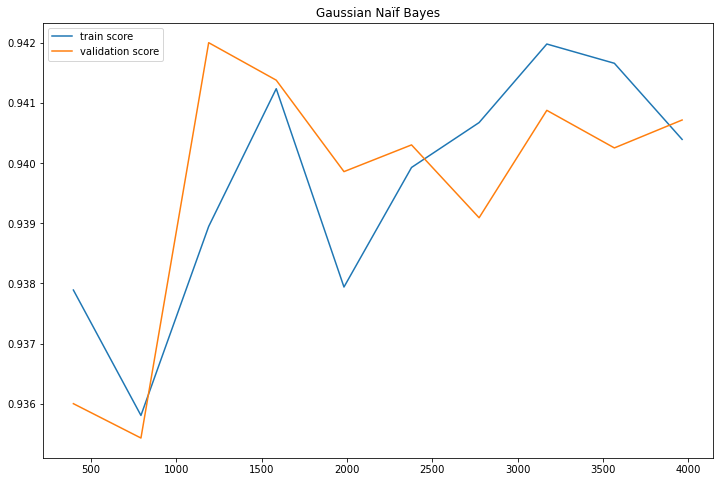

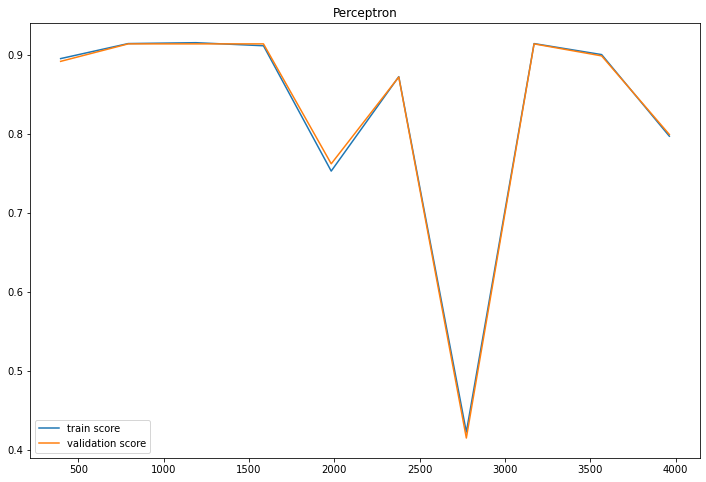

In [306]:
for key,i in liste.items():
    N, train_score, val_score = learning_curve(key, X_train, y_train,
                                                    cv=5, scoring = 'f1', 
                                                    train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(12,8))
    plt.title(i)
    plt.plot(N, train_score.mean(axis=1), label='train score ')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

# SELECTION DE VARIABLE

In [320]:
chi2(X_train, y_train)

(array([3.98026217e-01, 4.88086918e+00, 5.65555964e-01, 3.06537469e+00,
        5.08098886e+00, 5.59292146e-01, 3.63887674e-02, 5.91100368e-01,
        6.23757343e+01, 4.92674658e+01, 8.91616213e+01, 1.17468650e+04,
        2.23023751e+05, 5.04997339e+03, 6.34315526e+00, 3.76394954e+05,
        5.72748107e+03, 3.22891520e+01, 4.99114762e+01]),
 array([5.28110365e-01, 2.71559413e-02, 4.52030282e-01, 7.99767226e-02,
        2.41895700e-02, 4.54545588e-01, 8.48714882e-01, 4.41993928e-01,
        2.83798604e-15, 2.23335963e-12, 3.63839387e-21, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.17835089e-02, 0.00000000e+00,
        0.00000000e+00, 1.32852968e-08, 1.60841161e-12]))

In [322]:
select_var = SelectKBest(chi2, k=7) # appel de l'algo chi2
select_var.fit_transform(X_train, y_train) # application par la methode fit_transform
select_var.get_support() # resultat

array([False, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False])

In [349]:
a = select_var.get_support() # resultat
a = pd.DataFrame(a, index=X_train.columns).T
a = a[a==True].dropna(1)
a

,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,True,True,True,True,True,True,True


In [351]:
X_train = X_train[a.columns]

In [352]:
X_train

,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
6156,4,2,4120.0,1578,2542.0,4792,81
1631,6,4,3092.0,2165,927.0,1369,37
2206,4,3,2544.0,1848,696.0,2289,49
6687,4,1,2256.0,0,2256.0,4587,92
9944,3,2,18022.0,0,18022.0,14485,106
...,...,...,...,...,...,...,...
4144,1,4,4579.0,1506,3073.0,1915,44
2290,3,2,4815.0,1591,3224.0,2501,36
5724,3,3,1816.0,0,1816.0,2474,44
3010,5,4,34516.0,891,33625.0,2687,64


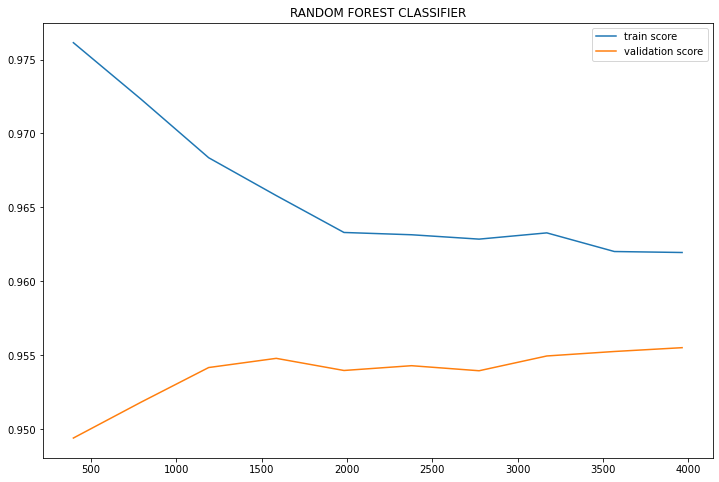

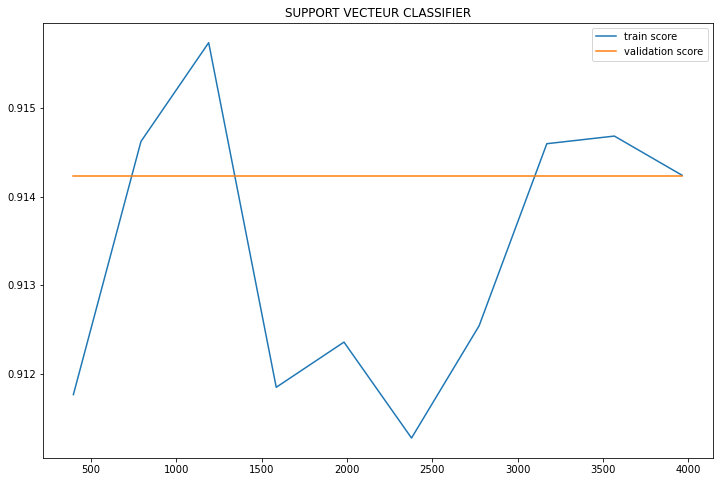

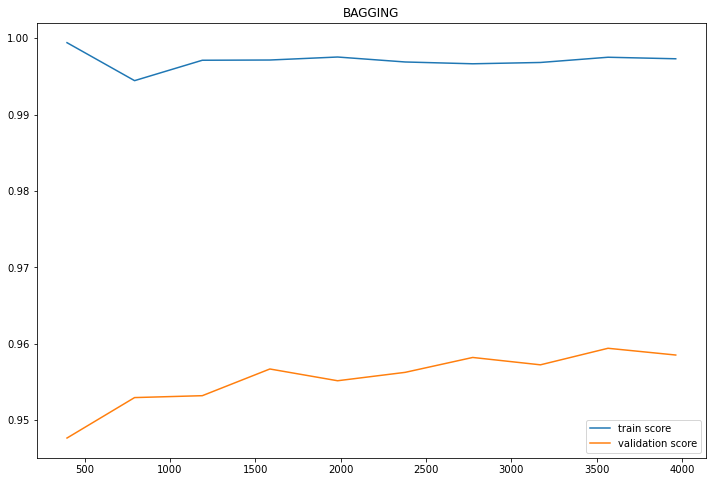

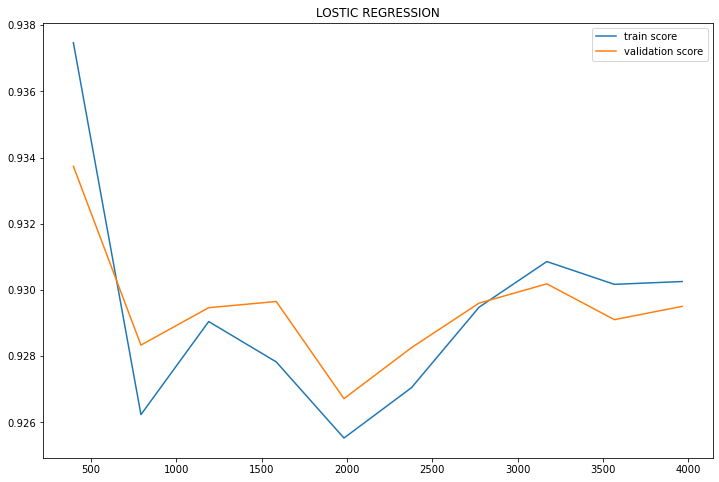

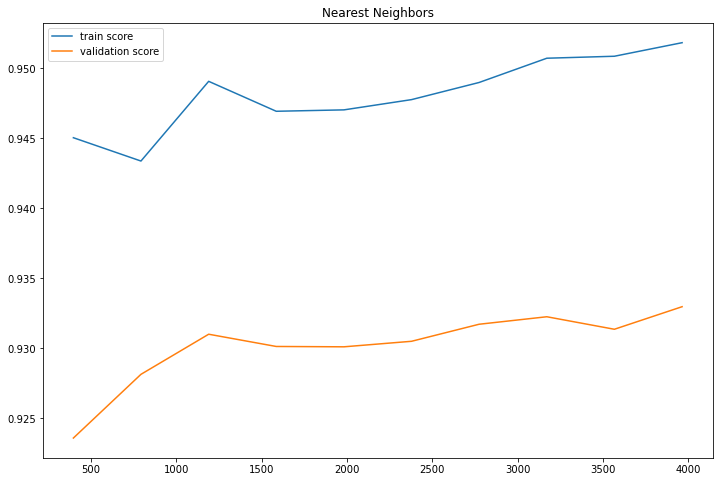

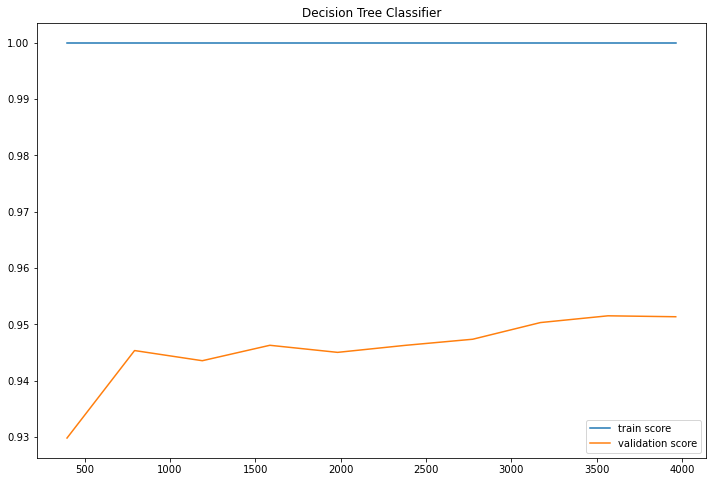

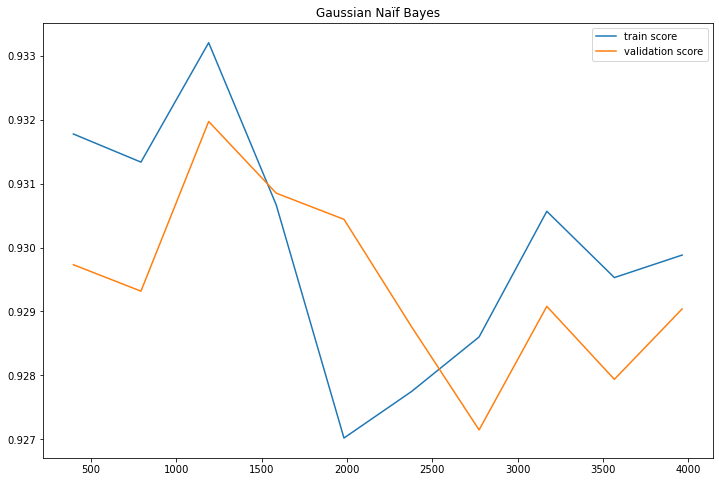

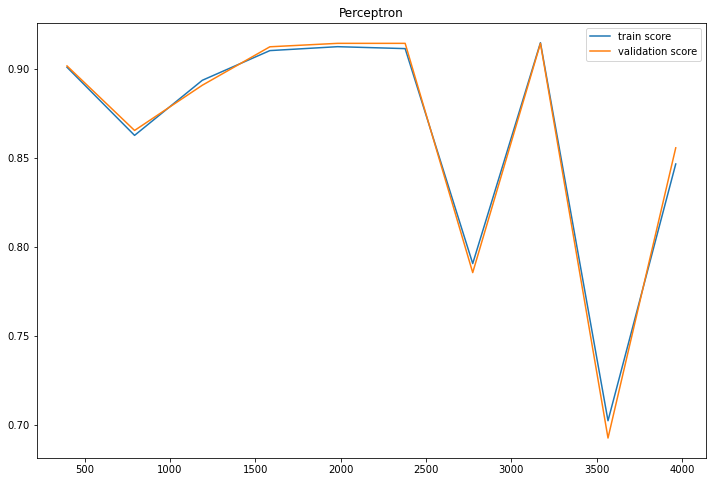

In [353]:
for key,i in liste.items():
    N, train_score, val_score = learning_curve(key, X_train, y_train,
                                                    cv=5, scoring = 'f1', 
                                                    train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(12,8))
    plt.title(i)
    plt.plot(N, train_score.mean(axis=1), label='train score ')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

#### LE MODEL QUI A UN EXCELLENT COMPROMIS BIAIS VARIANCE LE RANDOM FOREST CLASSIFIER

# CHERCHONS A OPTIMISER LES PARAMETRES CET MODEL

In [354]:
parameters = {'criterion':("gini", "entropy"), 'max_depth':[1, 5, 10],'n_estimators':[50, 100, 150, 200] }
clf = GridSearchCV(clf_1, parameters)

In [355]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=5, random_state=5),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 5, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [357]:
clf.best_score_

0.941688096090622

In [358]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [359]:
model = clf.best_estimator_

In [361]:
X_test = X_test[a.columns]

In [362]:
X_test

,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
7486,4,1,10762.0,703,10059.0,4509,71
8098,2,1,1438.3,0,1438.3,4722,81
5308,3,0,1451.0,0,1451.0,3866,72
8817,1,2,10896.0,2517,8379.0,4935,58
5413,6,3,1452.0,0,1452.0,2287,42
...,...,...,...,...,...,...,...
2495,6,2,9857.0,0,9857.0,3448,103
466,5,3,14035.0,2061,11974.0,1606,30
1779,5,4,3851.0,1695,2156.0,2349,61
2082,6,2,2909.0,1274,1635.0,1532,26


In [363]:
model.score(X_test, y_test)

0.9435294117647058

In [366]:
y_pred = model.predict(X_test)

In [367]:
confusion_matrix(y_test, y_pred)

array([[ 238,   92],
       [  28, 1767]], dtype=int64)

In [368]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.72      0.80       330\n           1       0.95      0.98      0.97      1795\n\n    accuracy                           0.94      2125\n   macro avg       0.92      0.85      0.88      2125\nweighted avg       0.94      0.94      0.94      2125\n'

In [369]:
X_test.columns

Index(['Total_Relationship_Count', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

In [ ]:
transc = {0:"CLIENT MECONTENT", 1:"CLIENT SATISFAIT"}
prediction = prediction.map(encod)
